In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt
import statistics as stats

In [2]:
df = pd.read_csv("./dataset1.csv")
print(df.head())

  Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   TM195   18    Male         14        Single      3        4   29562    112
1   TM195   19    Male         15        Single      2        3   31836     75
2   TM195   19  Female         14     Partnered      4        3   30699     66
3   TM195   19    Male         12        Single      3        3   32973     85
4   TM195   20    Male         13     Partnered      4        2   35247     47


In [3]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

### Therefore the dataset has no null values

In [4]:
df.shape

(180, 9)

In [5]:
print(df.describe())

              Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%     24.000000   14.000000    3.000000    3.000000   44058.750000   
50%     26.000000   16.000000    3.000000    3.000000   50596.500000   
75%     33.000000   16.000000    4.000000    4.000000   58668.000000   
max     50.000000   21.000000    7.000000    5.000000  104581.000000   

            Miles  
count  180.000000  
mean   103.194444  
std     51.863605  
min     21.000000  
25%     66.000000  
50%     94.000000  
75%    114.750000  
max    360.000000  


# Analysis on the basis of product model

In [6]:
df.Product.unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

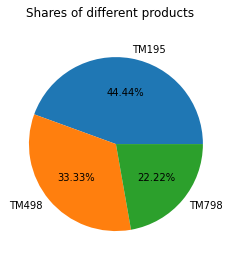

In [62]:
# No of people who own TM195
df195 = df[df.Product == 'TM195']
n195 = len(df195)
# No of people who own TM498
df498 = df[df.Product == 'TM498']
n498 = len(df498)
# No of people who own TM798
df798 = df[df.Product=='TM798']
n798 = len(df798)
x = [n195, n498, n798]
plt.pie(x, labels= ['TM195', 'TM498', 'TM798'], autopct= '%1.2f%%')
plt.suptitle('Shares of different products')
plt.show()

In [8]:
# Mean income of people who own TM195
mi195 = np.mean(df195.Income)
# Mean income of people who own TM498
mi498 = np.mean(df498.Income)
# Mean income of people who own TM798
mi798 = np.mean(df798.Income)
print(mi195, mi498, mi798)

46418.025 48973.65 75441.575


### Therefore we can conclude that people with higher income buy TM798

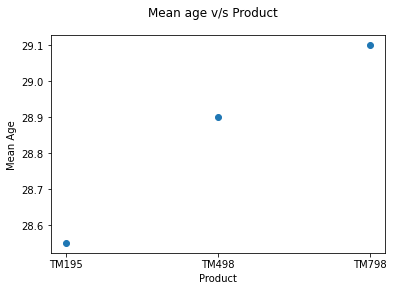

In [80]:
meanA195 = np.mean(df195.Age)
meanA498 = np.mean(df498.Age)
meanA798 = np.mean(df798.Age)
plt.scatter(['TM195', 'TM498', 'TM798'], [meanA195, meanA498, meanA798])
plt.xlabel('Product')
plt.ylabel('Mean Age')
plt.suptitle('Mean age v/s Product')
plt.show()

# General Analysis related to Age and Gender

In [9]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


25


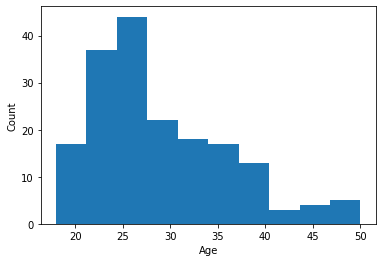

In [10]:
# mode of age
modeage = stats.mode(df.Age)
print(modeage)
plt.hist(data= df, x = 'Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
# ; after plot prevents the 

3


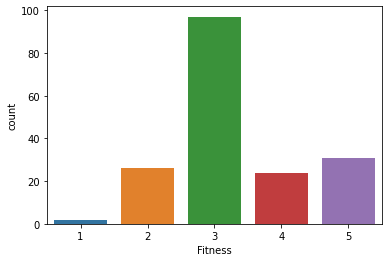

In [11]:
# Modal Self Rated Fitness level
modef = stats.mode(df.Fitness)
print(modef)
sb.countplot(data = df, x = 'Fitness');

In [26]:
# Average fitness level in each age range
maxage = max(df.Age)
minage = min(df.Age)
print(minage,maxage)
# R1 - 18-30, R2 - 31-40, R3 - 41-50
dfR1 = df[df.Age>=18][df.Age<=30]
dfR2 = df[df.Age>30][df.Age<=40]
dfR3 = df[df.Age>40][df.Age<=50]
# Mode Fitness of each age range
modeR1 = stats.mode(dfR1.Fitness)
modeR2 = stats.mode(dfR2.Fitness)
modeR3 = stats.mode(dfR3.Fitness)
meanR1 = stats.mean(dfR1.Fitness)
meanR2 = stats.mean(dfR2.Fitness)
meanR3 = stats.mean(dfR3.Fitness)
print(modeR1, modeR2, modeR3)
print(round(meanR1,2), round(meanR2,2), round(meanR3,2))
print(stats.mode(df.Fitness))

18 50
3 3 3
3.33 3.21 3.5
3
<ipython-input-26-ef6f52ba0ed6>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfR2 = df[df.Age>30][df.Age<=40]
<ipython-input-26-ef6f52ba0ed6>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfR3 = df[df.Age>40][df.Age<=50]


### With the above analysis we can conclude that according to self chosen fitness ratings, the fitness level of all age ranges is similar. Let us verify this conclusion with average miles ran/walked by each age range.       

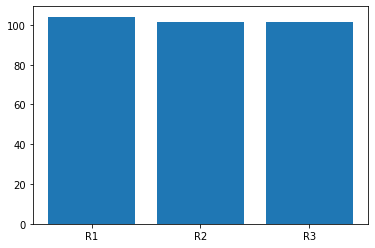

In [30]:
meanmR1 = stats.mean(dfR1.Miles)
meanmR2 = stats.mean(dfR2.Miles)
meanmR3 = stats.mean(dfR3.Miles)
meanmiles = [meanmR1, meanmR2, meanmR3]
ranges = ['R1', 'R2', 'R3']
plt.bar(ranges, meanmiles)
plt.show()

### Therefore the conclusion of fitness level being almost similar has been verified   

3.52 3.03


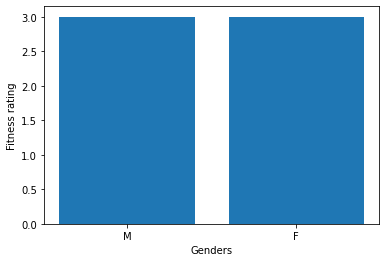

In [36]:
# Analysis based on gender
dfM = df[df.Gender == 'Male']
dfF = df[df.Gender == 'Female']
modeM = stats.mode(dfM.Fitness)
modeF = stats.mode(dfF.Fitness)
meanM = stats.mean(dfM.Fitness)
meanF = stats.mean(dfF.Fitness)
print(round(meanM,2),round(meanF,2))
plt.bar(['M', 'F'], [modeM, modeF])
plt.xlabel('Genders')
plt.ylabel('Fitness rating')
plt.show()

### Therefore self given Ftiness rating again indicate a similar fitness level across the two genders, although a little higher for the Male gender. Lets verify this conclusion with miles ran/walked. 

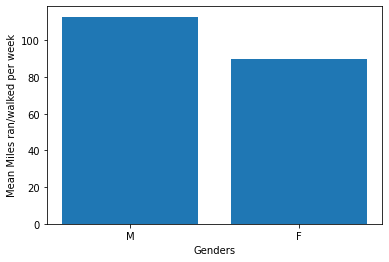

In [38]:
meanmM = stats.mean(dfM.Miles)
meanmF = stats.mean(dfF.Miles)
meanmilesG = [meanmM, meanmF]
plt.bar(['M', 'F'], meanmilesG)
plt.xlabel('Genders')
plt.ylabel('Mean Miles ran/walked per week')
plt.show()

### In terms of average miles ran/walked per week, Males outperform Females. But the relationship between fitness rating and miles is still unclear

In [48]:
dft = df[['Fitness', 'Miles']]
dft.corr()

,Fitness,Miles
Fitness,1.000000,0.785702
Miles,0.785702,1.000000


### As Fitness rating and miles have a strong positive correlation, we conclude that the male gender have a better fitness level as compared to the female gender

In [72]:
# Relation between fitness rating and usage
df[['Fitness', 'Usage']].corr()

,Fitness,Usage
Fitness,1.000000,0.668606
Usage,0.668606,1.000000


Range of Usage:  2 - 7


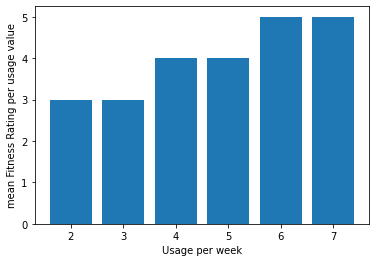

In [74]:
# mean fitness for each usage value
print('Range of Usage: ',np.min(df.Usage),'-',np.max(df.Usage))
meanFit = [round(np.mean(df[df.Usage == i].Fitness)) for i in range(2,8)]
plt.bar(df.Usage.unique(), meanFit)
plt.xlabel('Usage per week')
plt.ylabel('mean Fitness Rating per usage value')
plt.show()

### Therefore it is evident that Fitness Rating increases with increase in Weekly usage      

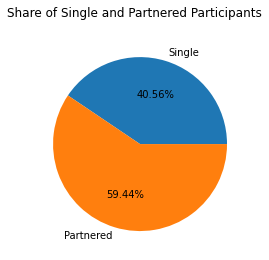

In [59]:
x = [len(df[df.MaritalStatus=='Single']), len(df[df.MaritalStatus=='Partnered'])]
plt.pie(x, labels=['Single', 'Partnered'],autopct='%1.2f%%')
plt.suptitle('Share of Single and Partnered Participants')
plt.show()

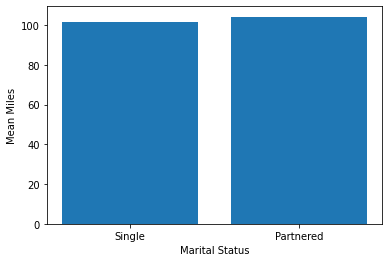

In [64]:
dfS = df[df.MaritalStatus=='Single']
dfP = df[df.MaritalStatus=='Partnered']
meanmS = np.mean(dfS.Miles)
meanmP = np.mean(dfP.Miles)
plt.bar(['Single', 'Partnered'], [meanmS, meanmP])
plt.xlabel('Marital Status')
plt.ylabel('Mean Miles')
plt.show()

### The mean miles of single and partnered participants seems to be similar. Lets get a conclusion from fitness levels 

In [76]:
meanfS = np.mean(dfS.Fitness)
meanfP = np.mean(dfP.Fitness)
modeS = stats.mode(dfS.Fitness)
modeP = stats.mode(dfP.Fitness)
print('Marital Means: ',meanfS, meanfP)
print('Marital Modes: ',modeS, modeP)


Marital Means:  3.3698630136986303 3.2710280373831777
Marital Modes:  3 3


### Therefore mean Fitness Rating solidifies the conclusion

In [79]:
# Analysis on the basis of education
df[['Age','Education', 'Income', 'Fitness']].corr()

,Age,Education,Income,Fitness
Age,1.000000,0.280496,0.513414,0.061105
Education,0.280496,1.000000,0.625827,0.410581
Income,0.513414,0.625827,1.000000,0.535005
Fitness,0.061105,0.410581,0.535005,1.000000


Education in years range:  12 - 21


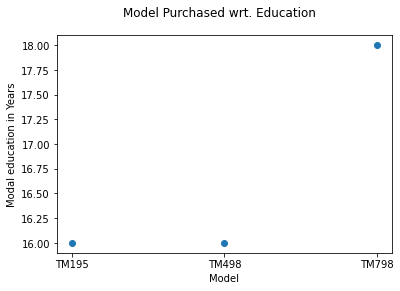

In [78]:
# Education with product
educationr = [np.min(df.Education), np.max(df.Education)]
print('Education in years range: ',educationr[0],'-',educationr[1])
modeEM195 = stats.mode(df195.Education)
modeEM498 = stats.mode(df498.Education)
modeEM798 = stats.mode(df798.Education)
plt.scatter(['TM195', 'TM498', 'TM798'], [modeEM195, modeEM498, modeEM798])
plt.xlabel('Model')
plt.ylabel('Modal education in Years')
plt.suptitle('Model Purchased wrt. Education')
plt.show() 

### Therefore as Income and Education are strongly correlated and higher income participants tend to go for TM798, the modal education years of TM798 is higher

# Conclusions
* Higher income participants tend to go for TM798, however there is not much difference in income group of TM498 and TM195.
* Mean age of purchasers of TM798, TM498 and TM195 is in the order of MA-TM798> MA-TM498> MA-TM195.
* The modal fitness range of the dataset is 3, while the modal age is 25.
* The modal fitness rating of:
    * R1 -> 18-30 = 3
    * R2 -> 31-40 = 3
    * R3 -> 41-50 = 3
    Therefor there is minimal difference in the average fitness levels of the age ranges according to both modal fitness rating
    and mean miles of rach range.
* The modal fitness rating of both Male and Female gender is 3, however males outperform in terms of gender average miles per week. As there is a strong correlation between miles and fitness rating, we can conclude that according to the present data Males have a better fitness level that females.
* Marital Status had almost no effect on Fitness levels. The modal fitness rating of both single and partnered participants is 3.
* As TM798 is bought by higher income participants, and income and Education are strongly correlated, the modal education years of purchasers of TM798 is higher as compared to TM498 and TM195.